<a href="https://colab.research.google.com/github/jess22jess/EDPII/blob/main/TAREA_M%C3%A9t_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DE GALERKIN
**EDP II**

**Jessica Beatriz Arcos Gutiérrez**

---

**Descripción:**

Resuelve la ecuación:
$$-{\frac{d^2 u}{dx^2} + u -x = 0 }$$

con condiciones:
- **Condición inicial:** $u(0) = u(1) = 0$
- **Dominio:** $0 \leq x \leq 1$
---
El método de Galerkin es una técnica numérica para resolver ecuaciones diferenciales. Busca una solución aproximada como combinación de funciones base, haciendo que el error sea "ortogonal" a cada función base mediante integrales. En este código resolvemos: -u'' + u = x con u(0)=u(1)=0 usando funciones base $φ_i(x) = sin(iπx)$.


**¿Por qué funciona?**

Al exigir que $∫(Residuo)*φ_j dx = 0$ para cada función base, minimizamos el error en el sentido del producto interno, obteniendo la mejor aproximación posible dentro del espacio de funciones definido por nuestra base elegida.

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Definimos variable y función
x = sp.symbols('x')
u = sp.Function('u')

In [11]:
ode = -u(x).diff(x, x) + u(x) - x  # definimos la ecuación
sp.dsolve(ode, u(x))

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [12]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})  # diccionario
# resolvemos la EDO con condiciones de contorno

In [13]:
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

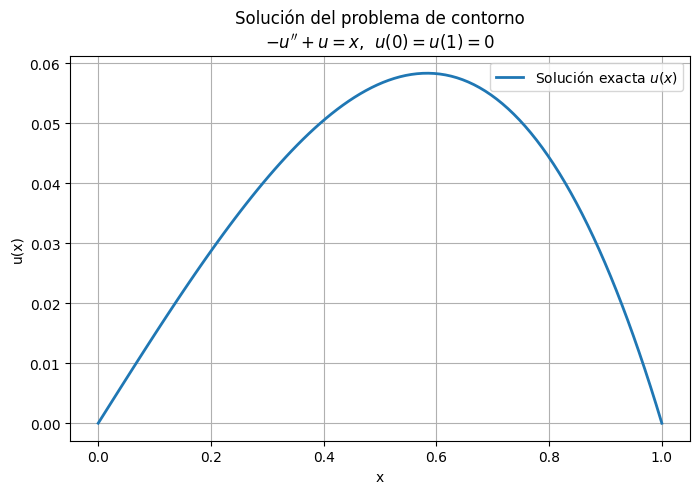

In [14]:
# Convertir la solución analítica a función numérica
u_expr = sol.rhs
u_num = sp.lambdify(x, u_expr, "numpy")

# Graficar solución analítica
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución exacta $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$-u'' + u = x$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

In [15]:
a, b, c = sp.symbols('a b c')

#Función de prueba u_n(x) que cumple u(0)=u(1)=0

u_3 = a*sp.sin(sp.pi*x) + b*sp.sin(2*sp.pi*x) + c*sp.sin(3*sp.pi*x)

In [16]:
u_3

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x)


Definimos el residuo R

In [17]:
u_3_d_2 = sp.diff(u_3, x, 2)

R = -u_3_d_2 + u_3 - x

In [18]:
R

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

In [19]:
R.simplify()

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

Ahora, imponemos las condiciones:

$\int_{0}^{1} R(x) \sin(\pi x) \, dx = 0$


$\int_{0}^{1} R(x) \sin(2\pi x) \, dx = 0$

$\int_{0}^{1} R(x) \sin(3\pi x) \, dx = 0$





In [20]:
# Aplicamos las condiciones de Galerkin
I_1 = sp.integrate(R*sp.sin(sp.pi*x), (x, 0, 1))
I_2 = sp.integrate(R*sp.sin(2*sp.pi*x), (x, 0, 1))
I_3 = sp.integrate(R*sp.sin(3*sp.pi*x), (x, 0, 1))

In [21]:
I_1

a/2 + pi**2*a/2 - 1/pi

In [22]:
I_2

b/2 + 2*pi**2*b + 1/(2*pi)

In [23]:
I_3

c/2 + 9*pi**2*c/2 - 1/(3*pi)

In [24]:
soleq = sp.solve([I_1, I_2, I_3], [a, b, c], simplify=True)  # resuelve el sistema
soleq

{a: 2/(pi + pi**3), b: -1/(pi + 4*pi**3), c: 2/(3*pi + 27*pi**3)}

In [25]:
u_approx = u_3.subs(soleq)  # sustituimos los coeficientes en la aproximación

In [26]:
u_approx

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [27]:
u_approx.simplify()

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [28]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1899711319.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Método de Galerkin con $φ_i(x) = \sin(i\pi x)$")


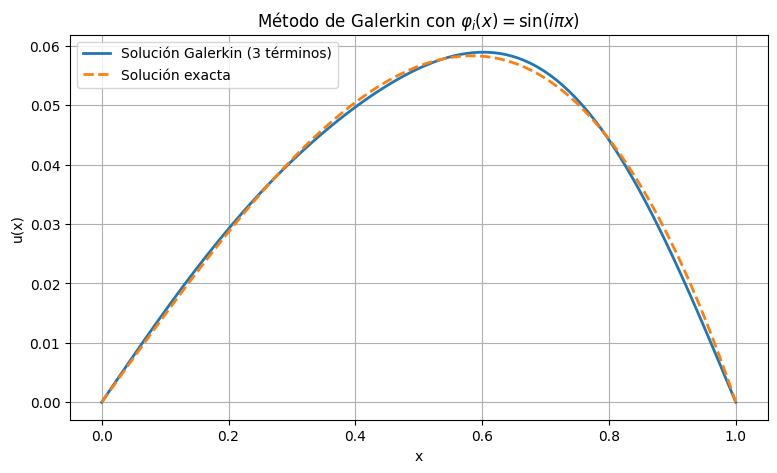

In [29]:
# Graficar solución aproximada y exacta
xx = np.linspace(0, 1, 100)
yy_approx = u_approx_fn(xx)

plt.figure(figsize=(9,5))
plt.plot(xx, yy_approx, label="Solución Galerkin (3 términos)", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

plt.title("Método de Galerkin con $φ_i(x) = \sin(i\pi x)$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()